<a href="https://colab.research.google.com/github/cap497/UFMG/blob/main/Mundo_Pequeno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

In [30]:
# Configurando a aparência dos gráficos
plt.rcParams['figure.figsize'] = (6, 6)

1 A)

In [31]:
def network(p, L, Z):
  G = nx.Graph()
  nodes = list(range(L))

  for i in range(1, Z // 2+1):
    targets = nodes[i:] + nodes[0:i]
    G.add_edges_from(zip(nodes, targets))

  for _ in range(int(p*L*Z / 2)):
    [u, v] = random.choices(nodes, k=2)
    if G.has_edge(u, v):
      continue
    G.add_edge(u, v)

  return G

2 B)

In [32]:
def find_path_lengths_from_node(graph, node):
  l = 0
  distances = [0] * graph.number_of_nodes()
  current_shell = [node]

  while len(current_shell) != 0:
    next_shell = []
    for i in current_shell:
      for j in list(graph.neighbors(i)):
        if distances[j] == 0 and j != node:
          next_shell.append(j)
          distances[j] = l + 1
    current_shell = next_shell
    l += 1

  return distances

In [33]:
def find_all_path_lengths(graph):
  lengths = []
  for i in range(graph.number_of_nodes()):
    lengths.extend(find_path_lengths_from_node(graph, i)[i:])

  return lengths

In [34]:
def find_average_path_length(graph):
  all_dists = find_all_path_lengths(graph)
  return sum(all_dists) / len(all_dists)

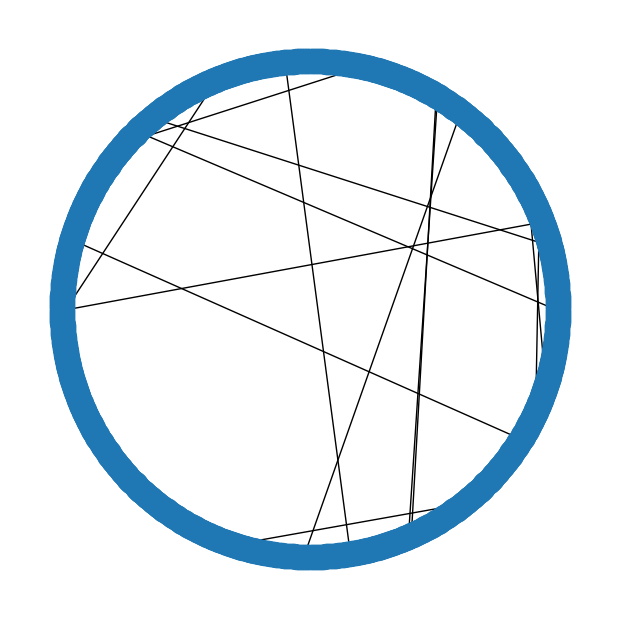

In [35]:
G = network(0.02, 1000, 2)
nx.draw_circular(G)

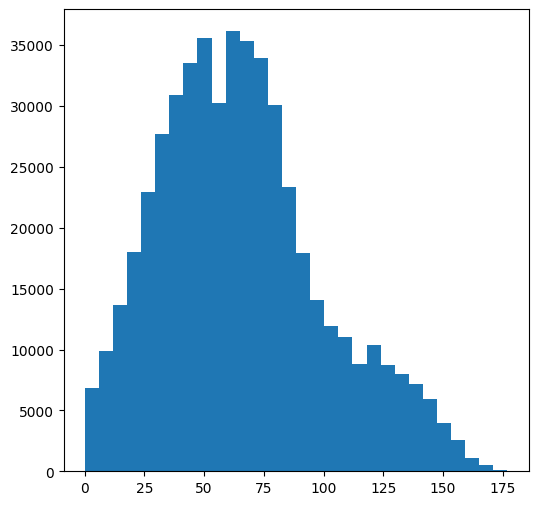

In [36]:
lengths = find_all_path_lengths(G)
_ = plt.hist(lengths, bins = 30)

In [37]:
find_average_path_length(network(0.02, 1000, 2))

51.60394205794206

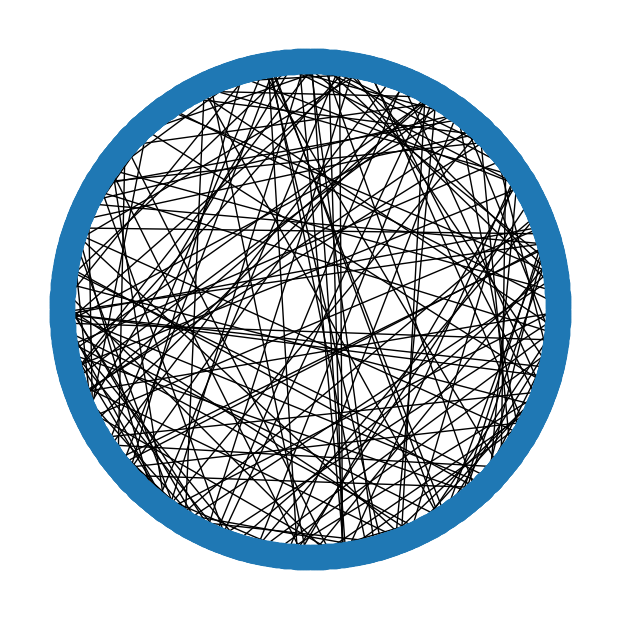

In [38]:
G = network(0.2, 1000, 2)
nx.draw_circular(G)

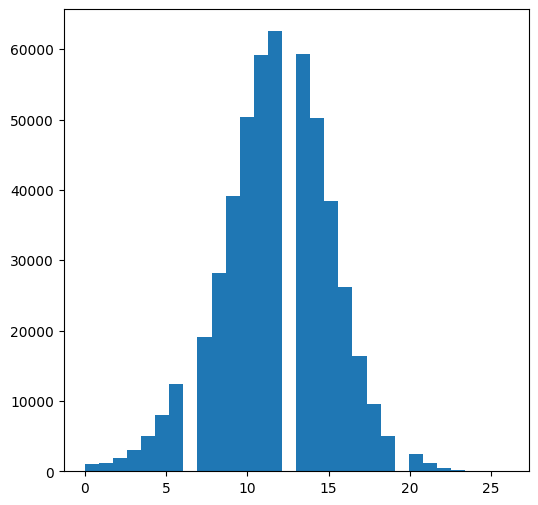

In [39]:
lengths = find_all_path_lengths(G)
_ = plt.hist(lengths, bins = 30)

In [40]:
find_average_path_length(network(0.2, 1000, 2))

11.537852147852147

Aumentar o *p* fez com que a distância, no geral, fosse bem menor, mal passando dos 25, enquanto com o *p* menor a distância em 120. A média reduziu de aproximadamente 47 para 11.

In [41]:
find_average_path_length(network(0.75, 1000, 2))

6.028443556443556

O *p* = 0.75 chegou bem próximo de ter 6 graus de separação.

In [42]:
print(find_average_path_length(network(0.1, 100, 2)))
print(find_average_path_length(network(0.1, 100, 2)))
print(find_average_path_length(network(0.1, 100, 2)))
print(find_average_path_length(network(0.1, 100, 2)))

9.12039603960396
9.933861386138615
11.464752475247526
9.143366336633663


Os resultados foram de fato em torno de *l* = 10. Este sistema possui aproximadamente $\frac{0.1x100x2}{2}$ = 10 arestas longas. Flutuações estatísticas são esperadas já que o algoritmo pode tentar inserir arestas que já existem na rede.

3 C)

In [43]:
def average_division():
  g_1 = find_average_path_length(network(0, 50, 2))
  x = 10**np.arange(-3, 0.001, 0.25)
  y = []
  for i in x:
    g_2 = find_average_path_length(network(i, 50, 2))
    y.append(g_2 / g_1)
  plt.semilogx(x, y, 'o')

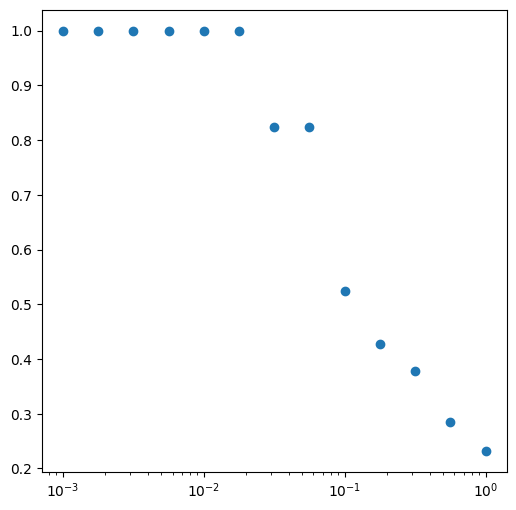

In [44]:
average_division()

Valores de *p* muito baixos resultam em uma quantidade irrisória de arestas longas na rede, logo a média dos caminhos para estes valores é muito próxima a de *l(p=0)*, que não possui arestas longas, e portanto a divisão de um pelo outro gera valores próximos a 1.

4 D)

6.3184313725490195

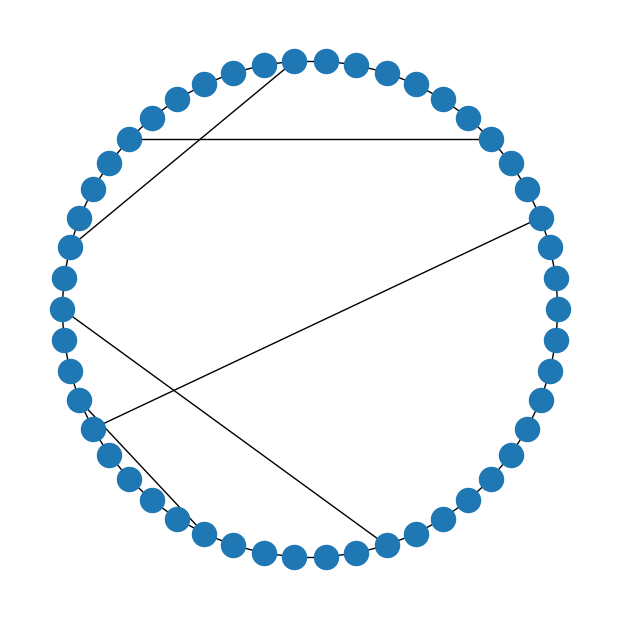

In [45]:
G = network(0.1, 50, 2)
nx.draw_circular(G)
find_average_path_length(G)

4.434235764235765

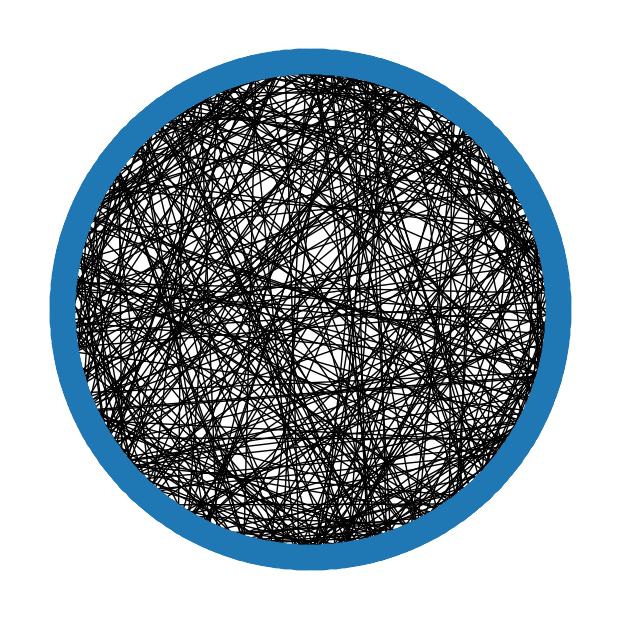

In [46]:
G = nx.watts_strogatz_graph(1000, 10, 0.1)
nx.draw_circular(G)
find_average_path_length(G)

20.043506493506495

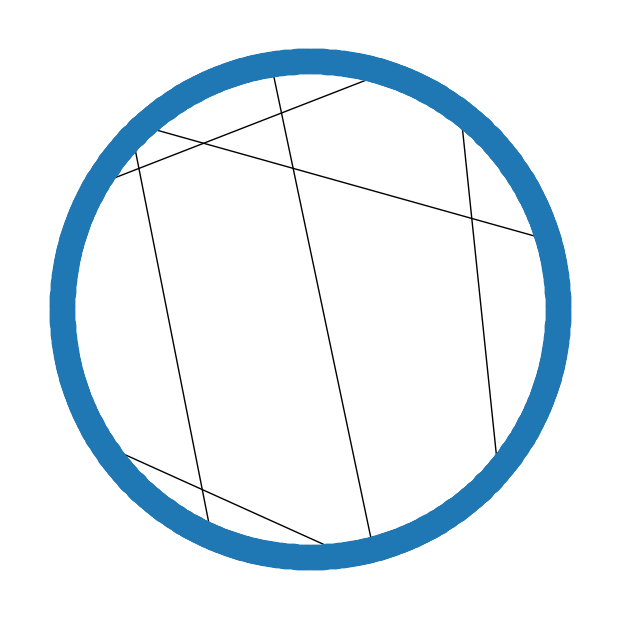

In [47]:
G = nx.watts_strogatz_graph(1000, 10, 0.001)
nx.draw_circular(G)
find_average_path_length(G)

O sistema de Watts e Strogatz foi mais semelhante ao implementado para *p* = 0.001.

In [48]:
def average_division_1(L, Z):
  x = []
  y = []
  for p in 10**np.arange(-3, 0.001, 0.25):
    G = network(p, L, Z)
    l = find_average_path_length(G)
    x.append((p * L * Z) / 2)
    y.append((np.pi * Z * l) / L)
  plt.semilogx(x, y, 'o-')

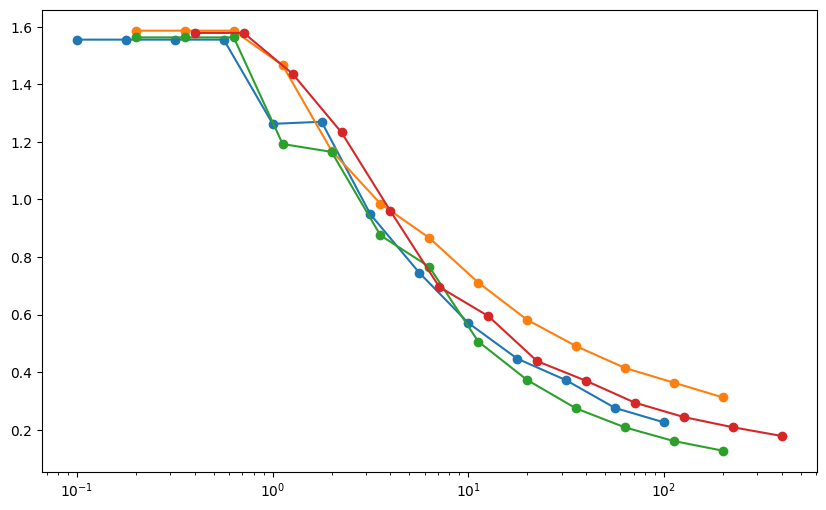

In [51]:
plt.figure(figsize=(10, 6))
average_division_1(100, 2)
average_division_1(100, 4)
average_division_1(200, 2)
average_division_1(200, 4)

5 E)

In [50]:
!wget --quiet -P ./files/ https://raw.githubusercontent.com/joaopmo/IFEC/main/protein.edgelist.txt
G = nx.read_edgelist("./files/protein.edgelist.txt", nodetype=int)

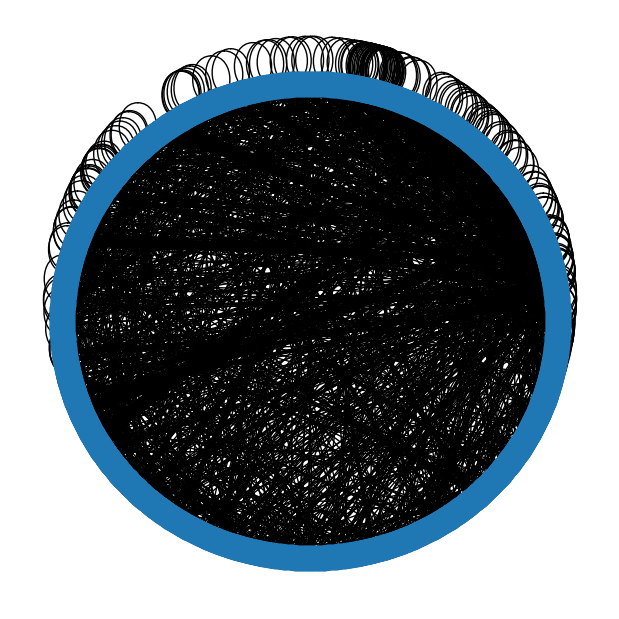

In [52]:
nx.draw_circular(G)

3.7340807423628157


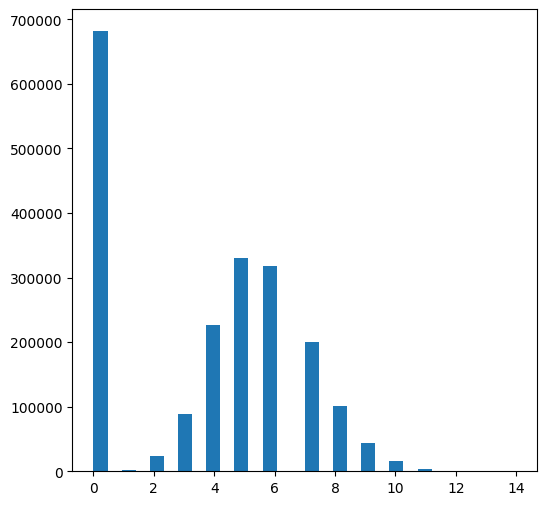

In [53]:
print(find_average_path_length(G))
lengths = find_all_path_lengths(G)
_ = plt.hist(lengths, bins = 30)